# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that**you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.**

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 6 End-of-course project: Build a machine learning model

In this activity,**you will practice using tree-based modeling techniques to predict on a binary target class.**  
<br/>   

**The purpose** of this model is to **find ways to generate more revenue for taxi cab drivers.**  
  
**The goal** of this model is to **predict whether or not a customer is a generous tipper.** 
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document. 

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# Build a machine learning model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?
 
5.   Can the objective be modified to make it less problematic?
 


**What are you being asked to do?**

* Predict if a customer will not leave a tip.

**Ethical Issues & Consequences of Errors**

* False Negative (Model Predicts a Tip When None is Given)

     * Drivers expect a tip but don’t get one → Leads to frustration, loss of trust in the system, and dissatisfaction with the platform.

* False Positive (Model Predicts No Tip When a Tip Is Given)
   
   * Drivers might avoid picking up the customer → Customers struggle to get taxis, leading to complaints and reduced service availability.

* Wider Impact
 
 * Even if the model is correct, it can create indirect discrimination against people who can’t afford to tip. This could limit access to taxis for lower-income customers and create unfair treatment based on financial ability rather than service needs.

**Do the benefits outweigh the risks?**

* No. The risks include:

  * Encouraging drivers to reject certain passengers, potentially leading to discrimination.

  * Damaging the taxi company’s reputation due to unfair treatment complaints.

  * Creating a negative feedback loop, where people perceived as "non-tippers" get worse service.


 **Would you proceed with the model?**
 
 * No. A model that indirectly leads to service denial for certain customers is unethical and risky for the business.
 
 **Can we modify the objective to make it more ethical?**
 
 * Yes! Instead of predicting who won’t tip, we can predict who tips generously (≥ 20%).
 * This helps drivers maximize their earnings without unfairly excluding customers.

**Positivity Definition (Based on Actual Data)** 

* Positive (1) → A generous tip (≥20%) will actually be given (actual data confirms this).
* Negative (0) → A generous tip will not actually be given (actual data confirms this).

**False Negative & False Positive Explained **

* False Positive (FP) → Model predicted a generous tip, but none was actually given.

  * Actual: Tip will not be given (Negative = 0).
  * Model predicted: Tip will be given (Positive = 1).
  * Error: The model falsely predicted the positive case. It assumed the customer would tip generously, but they didn’t.


* False Negative (FN) → Model predicted no generous tip, but one was actually given.

  * Actual: Tip will be given (Positive = 1).
  * Model predicted: Tip will not be given (Negative = 0).
  * Error: The model falsely predicted the negative case. It incorrectly assumed the customer wouldn’t tip generously, but they actually did.


**Impact of These Errors**

* False Positive Impact: Drivers expect a generous tip (because the model predicted it), but they don’t get one. This can lead to disappointment and unrealistic expectations based on the model's incorrect prediction.

* False Negative Impact: Drivers don’t expect a generous tip (because the model predicted they wouldn't), but they get one anyway. This could lead to missed opportunities if the system uses predictions to prioritize drivers or routes (e.g., failing to identify a potentially high-value trip).

**In short:**

* False Positive (FP): Predicts YES, Actual is NO. (Model is falsely positive). Impact: Disappointment/Wrong Expectation.
* False Negative (FN): Predicts NO, Actual is YES. (Model is falsely negative). Impact: Missed Opportunity.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


**What features do we need?**

 * To predict whether a customer is likely to tip generously, we need meaningful features such as:
    * Past tipping behavior (if available) – Most reliable indicator of future tipping.
    * Pickup & drop-off locations – Some locations (e.g., airports, business districts) may correlate with higher tipping rates.
    * Time & date of ride – Rush hour, weekends, and holidays may affect tipping behavior.
    * Fare amount – Higher fares might correlate with higher tips.
    *  Payment method – Card payments track tips, but cash tips are unknown, which could impact model accuracy.

**What is the target variable?**

* A binary classification variable:
 
  * 1 = Generous tipper (≥ 20%)

  * 0 = Not a generous tipper (< 20%)


**How do we evaluate the model?**

* Since this is a classification problem, we use:

  * Accuracy – Measures how often the model’s predictions are correct.
  * Precision – Ensures we don’t mislabel average tippers as generous, avoiding misleading drivers.
  * Recall – Ensures we capture as many genuinely generous tippers as possible.
  * F1-score – Balances precision & recall to optimize performance.

**Potential Risk of This Approach**

 * Even though we are not explicitly predicting non-tippers, drivers may interpret the absence of a “generous tipper” tag as a signal that a ride won’t result in a tip.

**How Can We Reduce This Risk?**
    
   * Transparency – Make it clear that the model only identifies generous tippers, not non-tippers.
   *  Randomization – Occasionally mark some non-generous tippers as “potential tippers” to prevent drivers from detecting a clear pattern.
    * Alternative Incentives – Instead of tagging individual customers, provide general tipping trends (e.g., “Rides in downtown areas on Fridays tend to tip well”).


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [45]:
# Import packages and libraries

import pandas as pd  # For data manipulation and analysis, It helps us work with data organised in tables (rows and columns).
import numpy as np  # For numerical operations

import seaborn as sn  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

from sklearn.model_selection import GridSearchCV, train_test_split  # For model selection and data splitting

from sklearn.ensemble import RandomForestClassifier  # For the Random Forest classification model
from xgboost import XGBClassifier  # For the XGBoost classification model

from xgboost import plot_importance  # For visualizing feature importance from XGBoost

from sklearn.metrics import roc_auc_score, roc_curve  # For ROC AUC score and curve calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay  # For various classification metrics and visualizations

**pandas library.**

* pandas is a powerful tool used for data cleaning, manipulation, and analysis.
* Think of it like a super-powered spreadsheet (like Excel or Google Sheets) for Python.
* It helps us work with data organised in tables (rows and columns).



**numpy library.**

* numpy stands for Numerical Python. It's the fundamental package for scientific
* computing and mathematical operations in Python.
*  It's especially useful for working with numbers, arrays (lists of numbers, or grids of numbers), and performing mathematical calculations quickly.


**Matplotlib (plt)**

* is like the basic drawing canvas and tools (pens, colors). It lets you create plots from scratch and control every single detail.

**Seaborn (sns)**

* is like a set of advanced stencils or templates built on top of Matplotlib. It makes creating specific types of complex statistical plots (like heatmaps or plots showing data distributions) much easier and often makes them look nicer by default.

**scikit-learn** 

* (a machine learning library) for model selection.


**GridSearchCV:** 

* Helps automatically find the best settings (hyperparameters) for a model by systematically trying many combinations. Used for model tuning.

**train_test_split**
   
* Splits your data into two parts: one for training the model and one for testing how well it performs on unseen data. Essential for evaluation.

**RandomForestClassifier from scikit-learn's 'ensemble' module.**

* An 'ensemble' model combines multiple simpler models to make better predictions.

* RandomForestClassifier builds many Decision Trees (a 'forest') on different parts of the data and combines their votes for the final prediction. It's good at preventing overfitting.

  * Random Data Sampling (Bootstrap Sampling / Bagging): Ensures each tree sees a slightly different version of the training data.
  * Random Feature Selection (Feature Subspacing): Ensures that each tree considers different aspects (features) of the data when making its decisions.

* 'Classifier' means it predicts categories (e.g., 'Yes'/'No', 'Cat'/'Dog').
from sklearn.ensemble import RandomForestClassifier

**XGBClassifier from the xgboost library**

* XGBoost (eXtreme Gradient Boosting) is another powerful 'ensemble' model, often using decision trees.
* It builds trees one after another, with each new tree focusing on correcting the mistakes made by the previous ones (this is called 'boosting').
* XGBoost is known for high performance and speed, often winning machine learning competitions.
* 'Classifier' means it predicts categories. (Note: xgboost is a popular external library).


In [46]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [47]:
# to Save the DataFrame to a CSV file named 'nyc_preds_means.csv' in the current directory
# nyc_preds_means.to_csv('nyc_preds_means.csv', index=False)


In [48]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [49]:
# Inspect the first few rows of df0
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Inspect the first few rows of `nyc_preds_means`.

In [50]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [51]:
# Merge datasets

df0 = df0.merge(nyc_preds_means,left_index=True, right_index=True)


**left_index=True and right_index=True in the pandas .merge() function.**

* In pandas, .merge() is used to combine two DataFrames, similar to joining tables in SQL. Usually, we merge based on matching values in one or more columns.

* However, sometimes we want to join DataFrames based on their index values instead of column values. That's where these arguments come in:

**left_index=True:**

* This tells the .merge() function: "For the left DataFrame (in our case, df0), use its index as the key for matching rows."

* It ignores columns for joining purposes on this left DataFrame.

**right_index=True:**

* This tells the .merge() function: "For the right DataFrame (in our case, nyc_preds_means), use its index as the key for matching rows."

* It ignores columns for joining purposes on this right DataFrame.

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [52]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

**Why  Boolean mask to filter df1 is this important?**
* Because:Tip amounts are only automatically recorded for credit card payments.Cash tips are not captured in the data (they appear as 0), even if a customer actually tipped.

**If we include cash payments in our data:**

    * We will mistakenly treat many tippers as non-tippers.

    * This will introduce noise and incorrect labels into our training data.

    * As a result, our model will learn inaccurate patterns.

**By filtering only credit card payments:**

    * We ensure our data reflects actual tip behavior.

    * Our model will be trained on correct tip amounts, improving accuracy and fairness.

    * It aligns with our goal: to predict generous tippers (e.g., those who tip ≥ 20%).



In [53]:
df0['payment_type'].unique()

array([1, 2, 3, 4])

* 1= Credit card 
* 2= Cash 
* 3= No charge 
* 4= Dispute 
* 5= Unknown 
* 6= Voided trip

In [54]:
# Subset the data to isolate only customers who paid by credit card
df1 = df0[df0['payment_type'] == 1]

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous. 

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system. 

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [55]:
# Run this cell
1.1 + 2.2
# answer is 3.3000000000000003, we expect this to be 3.3,

3.3000000000000003

Notice the three that is 16 places to the right of the decimal. As a consequence, if you were to then have a step in your code that identifies values ≤ 3.3, this would not be included in the result. Therefore, whenever you perform a calculation to compute a number that is then used to make an important decision or filtration, round the number. How many degrees of precision you round to is your decision, which should be based on your use case. 

Refer to this [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  

**Why Do We Need to Round the Tip Percentage?**

* When we calculate the tip percentage, we might expect a clean number like 0.20 (which is 20%).
* But computers don’t always store numbers exactly as we expect. They use something called floating-point arithmetic, which is just a fancy way of saying:

* Computers store numbers in a way that can sometimes add tiny errors.

In [56]:
# Create tip % col
df1['tip_percent'] = round(df1['tip_amount']/(df1['total_amount']-df1['tip_amount']),3)

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/4053809110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tip_percent'] = round(df1['tip_amount']/(df1['total_amount']-df1['tip_amount']),3)


Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [57]:
# Create 'generous' col (target)
df1['generous'] = df1['tip_percent']  # Initialize the 'generous' column with tip percentages
df1['generous'] = df1['tip_percent'] >= 0.2  # Create a boolean column 'generous' indicating if tip_percent is 20% or more
df1['generous'] = df1['generous'].astype(int)  # Convert the boolean 'generous' column to integers (True becomes 1, False becomes 0) 

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/2717810904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = df1['tip_percent']  # Initialize the 'generous' column with tip percentages
/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/2717810904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = df1['tip_percent'] >= 0.2  # Create a boolean column 'generous' indicating if tip_percent is 20% or more
/var/folders/x2/sq2yb3ds0zq2vzjfs86q624

* If it is (>= 0.2), it returns True

* If it is not), it returns False

  * True  1 (generous)

  * False 0 (not generous)



<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [58]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'],format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/2740175889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'],format='%m/%d/%Y %I:%M:%S %p')
/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/2740175889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')


In [59]:
df1['tpep_pickup_datetime'].dtype
df1['tpep_dropoff_datetime'].dtype

dtype('<M8[ns]')

* dtype('<M8[ns]') is the NumPy representation for a datetime data type with nanosecond precision, stored using 64 bits (8 bytes), 

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [60]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()
# Extract the day of the week from the 'tpep_pickup_datetime' column,
# get the full day name (e.g., 'Monday'), and convert it to lowercase.

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/73897157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()


In [61]:
 print(df1.head(5))

   Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
5    23345809         2  2017-03-25 20:34:11   2017-03-25 20:42:11   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
5                6           2.30           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186   


<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: **the hour (only) from the `tpep_pickup_datetime` column.**

* Taxi fares can sometimes be influenced by the time of day (e.g., surcharges during rush hour in some cities). By separating these periods, model can learn if there's a statistically significant difference in fares or tip percentages during these distinct parts of the day.

  * Extract the hour (0-23) from the pickup datetime.
    * This numerical hour will serve as the basis for defining
    * different time-of-day periods (like rush hours, daytime, nighttime).

In [62]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour  # Extract the hour of the pickup time

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour  # Extract the hour of the pickup time

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour  # Extract the hour of the pickup time

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour  # Extract the hour of the pickup time

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/2125425740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour  # Extract the hour of the pickup time
/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/2125425740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour  # Extract the hour of the pickup time
/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/2125425

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [63]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6<=  hour['am_rush'] <10:
        value =1
    else:
        value =0
    return value    

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

* If we didn't use the .apply() function, we would have to write much more verbose and often less efficient code to achieve the same results
* .apply() simplifies this and is often faster, especially for large DataFrames.
* If you want to perform a calculation on the values within a column (like finding the mean or maximum), you could use pandas' built-in functions directly (e.g., df1['A'].mean()).
* However, if you want to perform a more complex calculation that isn't built-in, .apply() provides a way to do it consistently across all columns.

In [64]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush,axis=1)
df1['am_rush'].head()

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/4191920234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1.apply(am_rush,axis=1)


0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

Write functions to convert the three remaining columns and apply them to their respective series.

In [65]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        value = 1
    else:
        value = 0
    return value

In [66]:
# Apply 'daytime()' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/371366598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1.apply(daytime, axis=1)


In [67]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        value = 1
    else:
        value = 0
    return value

In [68]:
# Apply 'pm_rush' function to the 'pm_rush' series
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/3651034778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_rush'] = df1.apply(pm_rush, axis=1)


In [69]:

# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        value = 1
    elif 0 <= hour['nighttime'] < 6:
        value = 1
    else:
        value = 0
    return value

In [70]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/230608774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nighttime'] = df1.apply(nighttime, axis=1)


#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [71]:
# Create 'month' col
# Extract the abbreviated month name (e.g., 'Jan', 'Feb')
# Convert the month name to lowercase
df1['month']= df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_63501/3890528661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month']= df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


 **%b**

* We use %b when we specifically want the short textual representation of the month (like "Apr" for April) rather than:

  * %B: The full month name (e.g., "April")
  * %m: The month as a zero-padded number (e.g., "04")

Examine the first five rows of your dataframe.

In [72]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,0,0,1,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.



**We need to drop columns that are:**

* Redundant/Irrelevant: Don't add unique information or aren't logically related to tipping.

*  Not Available at Prediction Time: Information that would only be known after the trip is completed or during payment


**Columns to DROP and Why:**

* Unnamed: 0 : Redundant. It doesn't contain inherent information about the trip itself.

* tpep_dropoff_datetime : Not Available at Prediction Time. The exact time the trip ends isn't known when the trip begins.

* tpep_pickup_datetime:Needed for time-based features.But we are dropping because the derived features like hour, day, month, etc enough.

* trip_distance : Not Available at Prediction Time. The final, precise distance traveled is only known after the trip is complete. While you might estimate distance beforehand, this column represents the actual outcome.

* store_and_fwd_flag : Irrelevant. This flag indicates if the meter data was stored locally before forwarding. It relates to the data transmission process, not passenger tipping behavior.

* payment_type : Not Available at Prediction Time / Data Leakage. The payment method is confirmed and processed at the end of the trip. Furthermore, how someone pays (especially Cash vs. Card) is highly correlated with whether a tip is electronically recorded at all. Using it would leak information about the payment process, which includes the tip stage.

* fare_amount : Not Available at Prediction Time. The metered fare depends on the final trip duration and distance, calculated at the end.

* extra : Not Available at Prediction Time. Extra charges (like rush hour, overnight surcharges) are calculated as part of the final fare.

* mta_tax : Not Available at Prediction Time. Calculated as part of the final fare.

* tip_amount : Data Leakage / Target Outcome. This is the actual tip amount. The model's goal is to predict if a tip will be given (likely derived from this), so this information cannot be used as an input feature.

* tolls_amount : Not Available at Prediction Time. Tolls depend on the actual route taken and are calculated during or after the trip.

* improvement_surcharge : Not Available at Prediction Time. Calculated as part of the final fare.

* total_amount : Not Available at Prediction Time / Data Leakage. This is the final bill, including fare, taxes, tolls, and the tip itself. Cannot be known beforehand.

* tip_percent : Data Leakage / Target Outcome. Derived directly from the tip_amount and fare. Cannot be used as an input feature.

**Columns to KEEP (Features for the Model + Target):**

* VendorID (1): Available. Identifies the vendor, might have a weak correlation. Keep for now.

* passenger_count (4): Available. Could potentially influence tips. Keep.

* RatecodeID : Available. Specifies the rate type (standard, airport, etc.), known at pickup. Keep.

* PULocationID : Available. Pickup location is crucial. Keep.

* DOLocationID : Available. Dropoff location is usually known or specified at the start. Keep.

* mean_duration : Available . this is a pre-calculated historical average duration for this route/time, available before the trip starts. Keep.

* mean_distance : Available . this is a pre-calculated historical average distance for this route, available before the trip starts. Keep.

* predicted_fare : Available .  this is a fare estimate shown to the customer before the trip (like in ride-sharing apps). Keep. 

* generous : TARGET VARIABLE. Must be kept to train the model (it will be separated into the y variable).

* day : Available. Derived from pickup time. Keep.

* am_rush : Available. Derived from pickup time. Keep.

* daytime : Available. Derived from pickup time. Keep.

* pm_rush : Available. Derived from pickup time. Keep.

* nighttime : Available. Derived from pickup time. Keep.

* month : Available. Derived from pickup time. Keep.

Summary:

The core principle is removing any information that wouldn't be known at the exact moment you need to make the prediction (before the trip ends) and removing columns that directly contain or are calculated from the tip amount itself. The generous column is kept only because it's needed as the target for model training.

In [73]:
# Drop columns
# Drop columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


* Machine learning models work best with numbers.

* Some of your columns contain categories or labels, not numbers that represent quantities. For example, RatecodeID uses numbers like 1, 2, 3, but these numbers don't mean "more" or "less" – they represent different types of fare rates (like 'Standard', 'JFK airport', etc.). The same applies to PULocationID and DOLocationID – location 265 isn't necessarily "bigger" than location 10, they are just different places.

* The Solution: One-Hot Encoding (using get_dummies)

**The Preparation Step**

* Identify the Columns: We need to tell pandas which numeric columns are actually categorical labels. We've identified these as VendorID, RatecodeID, PULocationID, and DOLocationID.
Convert to String: Before using get_dummies, we need to change the data type of these specific columns from numbers (int64) to text (string or object).

* We're converting the numeric labels in VendorID, RatecodeID, PULocationID, DOLocationID into text labels so that the get_dummies function understands they represent categories and correctly creates the separate "Yes/No" (0/1) columns needed for the machine learning model.

  * VendorID: The numbers 1 and 2 are just codes representing specific company names (Creative Mobile Tech vs. VeriFone Inc.). There's no numerical relationship between them.

  * PULocationID / DOLocationID: These numbers represent specific geographical zones (neighbourhoods or areas) defined by the TLC. Location ID 100 isn't inherently "more" or "less" than Location ID 50; they are just different places.

  * RatecodeID: The numbers 1 through 6 represent distinct types of fare structures (Standard, JFK, Newark, etc.). Rate code 6 isn't six times "more" than rate code 1; they are different predefined categories.
This confirms that using the numbers directly in a model could be misleading, as the model might incorrectly assume a mathematical relationship between them (e.g., that Ratecode 4 is "higher" than Ratecode 2).

**Therefore, converting these columns to strings (.astype(str)) before applying one-hot encoding (pd.get_dummies()) is the correct approach. This ensures that each unique ID (Vendor ID, Location ID, Rate Code ID) is treated as a separate category.**

**Even if we have any number of categories, pd.get_dummies still only uses 0s and 1s to represent them.**

In [74]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df1[col]=df1[col].astype('str')



<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [75]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1,drop_first= True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: bool(338), float64(3), int64(6)
memory usage: 6.1 MB


##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [76]:
# Get class balance of 'generous' col
df2['generous'].value_counts(normalize = True)

generous
1    0.526368
0    0.473632
Name: proportion, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

**False positives are worse for cab drivers,** because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

**False negatives are worse for customers,** because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

* F1 score is the metric that places equal weight on true postives and false positives, and so therefore on precision and recall.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [77]:
# Isolate target variable (y)
y = df2['generous']

# Isolate the features (X)
X = df2.drop('generous',axis = 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.2, random_state=42)

# stratify=y: This is very important for classification. It ensures that the proportion of
#             different values (classes) in the target variable 'y' (e.g., the percentage of
#             tipped vs. non-tipped rides) is the same in both the training set (y_train)
#             and the testing set (y_test) as it was in the original 'y'. This prevents
#             situations where, purely by chance, one set gets disproportionately more
#             examples of a certain class, which is especially crucial if the classes are imbalanced.

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


**n_estimators:**

- Simple Explanation: How many individual decision trees do you want to build inside the "forest"?

- Example Values to Try: 100, 200, 300 (or more if needed, start reasonably).

**max_depth:**

- Simple Explanation: What's the deepest (longest path of questions) any single tree in the forest is allowed to 
- Example Values to Try: 5, 10, 15, None (which means trees grow as deep as possible, often limited by other parameters like min_samples_leaf).

**min_samples_split:**

- Simple Explanation: How many data points (taxi trips in your case) must be in a group before the tree is allowed to even consider splitting that group further?


- Example Values to Try: 2 (the minimum), 5, 10, 20.

**min_samples_leaf:**

- Simple Explanation: After a split happens, how many data points (trips) must end up in each of the resulting new branches (the final "leaf" nodes)?

- Example Values to Try: 1 (the minimum), 2, 4, 8.

**max_features:**

- Simple Explanation: When a tree is deciding how to split a group, how many features (input columns like 'passenger_count', 'PULocationID_X', etc.) should it randomly choose from to find the best split?

- Example Values to Try: 'sqrt' (square root of the total number of features - a common default), 'log2', 0.5 (use 50% of features), or a specific number like 10.

**max_samples:**

- Simple Explanation: For training each individual tree, what fraction of the original training data should be randomly selected (with replacement, meaning some rows might be picked multiple times)?

- Example Values to Try: 0.7, 0.8, 0.9, None (equivalent to 1.0 or using all samples).


**Now we Instantiate the RandomForestClassifier model**

  * Why instantiate?
    * Think of RandomForestClassifier() like a blueprint for a machine learning model.
    * When we create 'rf', we're building a model based on that blueprint, which we can train later.

 * Why no extra parameters?
   * We're starting with default values for now:
     * - n_estimators = 100 (number of trees)
     * - max_depth = None (trees grow as deep as needed)
     * - min_samples_split = 2 (minimum samples to split a node)
     * These defaults usually give good performance. We can fine-tune them later using grid search or random search.

  * Why random_state=42?
    * Setting a random_state ensures reproducibility — you'll get the same result every time you run the code.
    
    
**Then Define hyperparameter grid using a dictionary**
  *  Why use a dictionary?
     * Organizes all parameters in one place for easy readability and updates
     * Required by GridSearchCV or RandomizedSearchCV to explore combinations
     * Enables quick experimentation by listing multiple values per parameter
     * Keeps code clean, modular, and easy to maintain
     * Automates model optimization through systematic tuning
     
     
**Next Use GridSearchCV to find the best combination of hyperparameters**

* GridSearchCV helps us automatically test different combinations of hyperparameters  (like number of trees, max depth, etc.) to improve model performance.

  * rf         → The Random Forest model we're trying to tune
  * cv_params  → A dictionary of hyperparameter values we want to test
  * scoring    → How we evaluate the model (e.g., using accuracy, F1 score, etc.)
  * cv=4       → 4-fold cross-validation: 
                 
       * our data is split into 4 parts
       * The model is trained on 3 parts and tested on the 1 remaining part
       * This is repeated 4 times, rotating the test part each time
       * It helps make sure the model performs well across different data


  * refit='f1' → Once the best model is found, it will be retrained using all the data and the best F1 score setting

* Why GridSearchCV's useful:
  * Automates finding the best model

  * Reduces guesswork in tuning parameters

  * Helps prevent overfitting or underfitting



In [78]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [79]:
# Since we gave only one value for each hyperparameter in cv_params,
# GridSearchCV doesn't perform an actual "search" — it just runs one model with these fixed settings.
# So rf1.best_params_ will simply return the same values we provided.

# However, using GridSearchCV is still useful because:
# - It performs cross-validation to give a reliable estimate of model performance.
# - It evaluates using the scoring metrics we specified.
# - It provides a convenient interface to access .best_estimator_, .best_score_, and .best_params_.
# - It keeps the code structure consistent and allows easy expansion of the parameter grid in the future.



Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [80]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 1min 58s, sys: 427 ms, total: 1min 59s
Wall time: 1min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [88]:
import pickle 

# Define a path to the folder where you want to save the model
path = './models/'

In [89]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

**Explanations:**

* path: The location where you want to save the model, which should be a string representing the directory. If it doesn't exist, you may need to create the directory first.

* model_object: The actual model object that you want to serialize and save. This could be any machine learning model, such as a trained Random Forest model or a trained neural network.

* save_name: The name for the saved file, which will be appended with .pickle. This helps you identify the model easily when you retrieve it later.

**with open(path + save_name + '.pickle', 'wb') as to_write:**

* This line opens the file in write-**binary mode.**

* **The path + save_name + '.pickle'** is the location and name of the file where the model will be saved.

* The file object **to_write** will be used to write data to the file.

**pickle.dump(model_object, to_write)**

* This serializes the model_object (your trained machine learning model) and writes the serialized model to the to_write file.

* with open(...): ensures that the file is automatically closed after the operation completes, which is good practice for resource management.

**Why "with open(...)" is used:**

  * Using the with statement is beneficial because:

  * It handles opening and closing the file for you, ensuring the file is properly closed even if an error occurs inside the block.

  * It's cleaner and avoids potential issues related to manually closing files.

In [90]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

**path + saved_model_name + '.pickle':** 

* Specifies the location and name of the file to read the model from.

**'rb':** 

* Open the file in read-binary mode to read the pickled model.

**with open(...) as to_read::**

* Ensures the file is opened safely and automatically closed after the operation is complete.

**pickle.load(to_read):** 

* Deserializes (unpickles) the byte stream from the file and converts it back into a Python object.

**return model:** 

* Returns the deserialized model object, making it available for use after reading.



**After running rf1.fit(X_train, y_train), GridSearchCV has:**
  
  * 1. Trained multiple models using different hyperparameter combinations.
  * 2. Evaluated each model using cross-validation and your scoring metric (like 'f1').
  * 3. Identified the best-performing model based on the highest average CV score.
  * 4. Re-trained that best model on the entire training set because refit='f1' was specified.

**the following attributes to inspect the results:**

* rf1.best_estimator_       #  The best model (RandomForestClassifier) with optimal hyperparameters.
* rf1.best_params_          # The exact hyperparameters used for that best model.
* rf1.best_score_           # The best cross-validated score achieved (based on the scoring metric).


Examine the best average score across all the validation folds. 

**Interpreting `rf1.best_score_`**

* Since we used multiple scoring metrics (`accuracy`, `precision`, `recall`, `f1`) and set `refit='f1'`, the `best_score_` gives:

  - The **best average F1 score** (across 4 cross-validation folds)
  - For the model that performed best on F1

* This is useful to see **how well the best model actually performed** during validation.

In [91]:
# Examine best score
rf1.best_score_

0.7133701077670043

Examine the best combination of hyperparameters.

In [92]:
# the best combination of hyperparameters.
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [93]:
rf1.best_estimator_

RandomForestClassifier(max_features=1.0, max_samples=0.7, n_estimators=300,
                       random_state=42)

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

**Save:** 

* Use write_pickle(path, rf1, 'rf1_gridsearch_model') to save the rf1 object to the "models" folder.

**Load:** 

* Use read_pickle(path, 'rf1_gridsearch_model') to load the saved rf1 object from the folder later.

In [94]:
# Save rf1 (GridSearchCV object) in the "models" folder with the name "rf1_gridsearch_model"
write_pickle(path, rf1, 'RF CV')

In [95]:
# Load rf1 (GridSearchCV object) from the "models" folder
rf1_loaded = read_pickle(path, 'RF CV')

# Now rf1_loaded contains the same object as rf1, and you can use it to access the best model or results
print(rf1_loaded.best_estimator_)

RandomForestClassifier(max_features=1.0, max_samples=0.7, n_estimators=300,
                       random_state=42)


**Note**

* The "saving disabled" message might be related to the fact that Jupyter Notebooks, especially in environments like certain cloud-based platforms or when using specific configurations, may restrict file writing due to permission issues or settings in the environment.

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [96]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

**a simplified explanation of the make_results function:**

**Purpose:**

* This function helps you gather and present the performance results (precision, recall, F1 score, and accuracy) of a machine learning model (such as one that went through a grid search) in a clean table format.

**Explanation:**

* Inputs:

  * model_name: A string representing the name you want to assign to your model in the output table (e.g., "RandomForestClassifier").

  * model_object: A fitted GridSearchCV object, which contains the results of training the model with multiple hyperparameter combinations.

  * metric: A string (like "precision", "recall", "f1", or "accuracy") to decide which metric to focus on when selecting the best model.

* Process:

  * Step 1: Create a dictionary (metric_dict):

    * This dictionary maps the metric you pass (like 'precision') to the corresponding column name in the GridSearchCV results (mean_test_precision, mean_test_recall, etc.).


   * Step 2: Extract the results from GridSearchCV:

     * The results from the cross-validation (CV) are stored in model_object.cv_results_. This is a dictionary, which is converted into a pandas DataFrame for easier manipulation.

   * Step 3: Find the row with the best performance for the selected metric:

     * We use idxmax() to get the index of the row with the highest score for the selected metric. This row contains the model's performance for all hyperparameters tested during GridSearchCV.

   * Step 4: Extract the best performance scores (precision, recall, F1, and accuracy):

     * From the best model's row (identified in step 3), we extract the values for precision, recall, F1, and accuracy.

   * Step 5: Create a new DataFrame (table):

     * A new pandas DataFrame is created to store the model name and its corresponding performance metrics (precision, recall, F1, accuracy).

**Output:**

The function returns the table, which contains the name of the model and its performance scores.

Call `make_results()` on the GridSearch object.

In [97]:
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.675349,0.756223,0.71337,0.680314


* This gives us cross-validated scores from the training process.

* Specifically, it reports the average metrics (precision, recall, f1, and accuracy) on the validation folds during GridSearchCV.

* this is not test performance — it's how well the model did during training cross-validation.

Your results should produce an acceptable model across the board. **Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case.** 

**Optional:** try to improve the scores. It's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

* we now use your trained model to make predictions on the unseen test set:

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

**Why Use Multiple Models on the Test Data?**

   * Using multiple models on the test set lets us to compare their real-world performance on data they haven’t seen.

   * It helps ensure we're not picking a model just because it did well on training/validation.

   * This leads to a more reliable comparison for model selection.

**Drawback: Once we use the test set to choose your final model, it’s no longer a "pure" test set**

  * That means we've indirectly tuned your model using the test data.

  * This slightly biases our estimate of how it will perform on truly unseen, real-world data.
  


In [98]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

* rf1.best_estimator_: This gives us the best model found by GridSearchCV (based on the metric you chose for refit, which was 'f1').

* .predict(X_test): we're using that best model to predict the labels for your unseen test data.

* rf_preds: Stores the predicted values so you can evaluate the model using metrics like accuracy, precision, recall, F1, etc.

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [99]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

**model_name: str**

* What it is: Just a name for the model as a string (e.g., 'Random Forest', 'Logistic Regression', etc.)

* Why: To label our results when displaying the scores in a DataFrame.

* Example : 'RF CV'

**preds**

* What it is: The predictions made by your model on the test data.

* Why: So you can compare these predictions to the actual labels and calculate performance metrics.

* How you get it: preds = model.predict(X_test)

**y_test_data**

* What it is: The true labels for your test data.

* Why: Needed to evaluate how close your predictions are to the real values.

* How you get it:This comes from your earlier train-test split:

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [100]:
 # Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.675349,0.756223,0.713370,0.680314
0,RF test,0.674419,0.775980,0.721644,0.684900


**Question:** How do your test results compare to your validation results?

All scores increased by at most ~0.02.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

* They are different algorithms with different internal workings, so each has its own set of hyperparameters that control how it learns from data.

* XGBoost is a boosting algorithm – it builds trees sequentially, each trying to fix the errors of the last one. 

* So it needs additional parameters for controlling the learning rate and regularization:

 **learning_rate (aka eta)**

* What it does: Controls how much each new tree contributes to fixing the errors from previous trees.

* Think of it like how fast we want to learn. If it's too fast, we might overcorrect. If it's too slow, we might need many rounds to learn well.

* ypical values: 0.01 to 0.3

* Trade-off: Lower learning rate → better accuracy, but need more trees (n_estimators).

**n_estimators**

* What it does: Tells XGBoost how many trees (boosting rounds) to build.

* Each tree is small and focused on improving the model bit by bit.

* More trees usually help, as long as we don't overfit.

*  Typical values: 100 to 1000+, depending on our learning_rate.

**max_depth**

* What it does: Limits how deep each decision tree can grow.

* Deeper trees = can learn more complex patterns

* But also higher chance of overfitting (memorizing the data)

* Typical values: 3 to 10

* Shallow trees work better when data is noisy or small.

**min_child_weight**

* What it does: Minimum sum of instance weight (hessian) in a child node. Prevents creating nodes that are too small or pure.

* Think of it like saying: "Don't create a decision based on too little evidence."

* Typical values: 1 to 10

* Higher value → more conservative (fewer splits) → less overfitting



In [101]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

* XGBoost can handle different types of tasks. There are different objectives:So, mentioned objective='binary:logistic'

Now fit the model to the `X_train` and `y_train` data.

In [102]:
%%time
xgb1.fit(X_train, y_train)


CPU times: user 33.9 s, sys: 6.44 s, total: 40.3 s
Wall time: 5.33 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Get the best score from this model.

In [103]:
# Examine best score
xgb1.best_score_

0.6950000480560781

And the best parameters.

In [104]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [105]:
# Call 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.675349,0.756223,0.713370,0.680314
0,RF test,0.674419,0.775980,0.721644,0.684900
0,XGB CV,0.668904,0.723398,0.695000,0.665821


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [106]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [107]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.675349,0.756223,0.713370,0.680314
0,RF test,0.674419,0.775980,0.721644,0.684900
0,XGB CV,0.668904,0.723398,0.695000,0.665821
0,XGB test,0.677219,0.745488,0.709716,0.679004


In [108]:
print(results.to_csv())

,model,precision,recall,F1,accuracy
0,RF CV,0.6753487684348095,0.7562227753578096,0.7133701077670043,0.6803144448083852
0,RF test,0.6744186046511628,0.775980087118855,0.7216435185185185,0.6849000982640027
0,XGB CV,0.6689037660704943,0.7233976353453639,0.6950000480560781,0.6658205044218801
0,XGB test,0.6772187676653476,0.7454884878655881,0.7097156398104265,0.6790042581067802



**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

* The F1 score is ~0.014 lower than the random forest model. Both models are acceptable, but the random forest model is the champion.

Plot a confusion matrix of the model's predictions on the test data.

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');

# It defaults to showing whole numbers (integers), with no formatting applied.

# If you don’t set it, it will automatically decide based on the type of your confusion matrix values

**Question:** What type of errors are more common for your model?

The model is almost twice as likely to predict a false positive than it is to predict a false negative. Therefore, type I errors are more common. This is less desirable, because it's better for a driver to be pleasantly surprised by a generous tip when they weren't expecting one than to be disappointed by a low tip when they were expecting a generous one. However, the overall performance of this model is satisfactory. 


The model is almost twice as likely to guess that a tip will be generous when it's actually not (false positive) than the other way around (false negative). This isn't ideal, because it's better for a driver to be happily surprised by a generous tip than to expect one and be let down. Still, the model performs well overall.

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

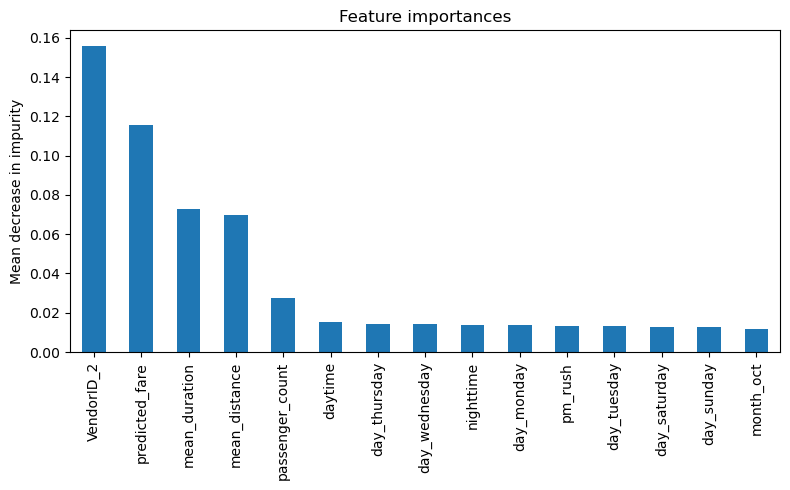

In [109]:
# Get the feature importances from the best estimator of the random forest model
importances = rf1.best_estimator_.feature_importances_

# Create a pandas Series with feature importances and corresponding feature names
rf_importances = pd.Series(importances, index=X_test.columns)

# Sort the importances in descending order and take the top 15 features
rf_importances = rf_importances.sort_values(ascending=False)[:15]


fig, ax = plt.subplots(figsize=(8,5))  #  Make canvas and plot area

rf_importances.plot.bar(ax=ax)  #  Draw bar plot on that area

ax.set_title('Feature importances')  #  Title

ax.set_ylabel('Mean decrease in impurity')  # SLabel Y-axis,
# "Mean Decrease in Impurity" = How much a feature helps split the data cleanly, on average.

fig.tight_layout();  # Adjust layout to avoid clipping

**Why a Series(here, we Create a pandas Series with feature importances and corresponding feature names)?**

* A pandas Series is like a labeled one-dimensional array. It's perfect for pairing each feature importance value with its feature name (from the columns of X_test).

* This makes it easier to sort, visualize, and understand which features are most important.

**What are fig and ax in this line?**

* fig, ax = plt.subplots(figsize=(8, 5))
* This creates two things:

   * fig: the entire figure (the full blank canvas)

   * ax: the actual plot area (the chart drawn on the canvas)
   
**What does ax=ax mean?**

* rf_importances.plot.bar(ax=ax)

  * We're telling pandas: "Draw the bar chart on this specific area (ax) that I just made."

  * So instead of pandas creating its own plot area, it uses the one we made with plt.subplots() — which gives us more control (like setting titles, axes labels, etc.).





<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  

Yes, this model performs acceptably. This is justified based on the F1 score of 0.7216 and accuracy of 0.6849, both indicating decent performance. The F1 score shows a good balance between precision and recall, which is especially important when both false positives and false negatives matter.

The model achieved a recall of 0.7760, meaning it correctly identified approximately 78% of the actual responders in the test set. Assuming a random guess would result in around 50% recall, we can calculate the improvement as:

Improvement = (77.6 - 50) / 50 = 55.2% better than random.

Given its performance, it may be worthwhile to test this model with a small group of taxi drivers to gather real-world feedback and explore opportunities for further refinement.

2. **What was your model doing? Can you explain how it was making predictions?** 

Random forest models are powerful but not very easy to interpret. In our case, we know that VendorID, predicted_fare, mean_duration, and mean_distance were the top features influencing predictions. However, we don’t know exactly how these features affect tipping behavior without further analysis.

One interesting finding is that VendorID was the most important feature. This suggests that one vendor may consistently attract more generous tippers than the other. It could be helpful to run statistical tests to explore whether there’s a meaningful difference between the vendors in terms of tipping behavior.

3. **Are there new features that you can engineer that might improve model performance?**  

* There are almost always additional features that can be engineered, but ideally, the most obvious ones would have been created during the initial round of modeling.

* In our case, we can consider a few new feature ideas to potentially improve model performance:

  * 1. Trip Length Categories:
        * Create three new columns that categorize trip distance as short, medium, or long.
        * This could help the model detect patterns in tipping behavior based on trip length.

  * 2. Rounding-Up Behavior (round5_ratio):

        * We can engineer a new column to capture how close the fare is to the next higher multiple of 5. This is based on the psychological tendency of people to round up when tipping.

*    For example:

*    - A fare of 12 is 3 away from 15, so the value of round5_ratio would be:

*      round5_ratio = 3 / 12 = 0.25
*    - A fare of 14.80 is only 0.20 away from 15, so the ratio is smaller:
*      round5_ratio = 0.20 / 14.80 ≈ 0.0135

*     The idea is that a lower value for round5_ratio might be associated with smaller tips,  since the fare is already close to a round number (like 15),  and the customer may feel less need to tip extra.


   *  Formula:
      *  round5_ratio = (5 - (fare % 5)) / fare


      * 3. Rounding-Up Behavior (round10_ratio):
            *    Similarly, we can create a feature for the nearest 10:
            *   round10_ratio = (10 - (fare % 10)) / fare

* These features aim to capture subtle human behaviors, like rounding habits, that might influence tipping — and could help the model make better predictions.

4. **What features would you want to have that would likely improve the performance of your model?**   


*  Past Tipping Behavior:
   
   * Having access to each customer's historical tipping behavior would likely be one of the most valuable features. It could help the model identify patterns and preferences on an individual level.

*  Tip Values for Cash Payments:
   *  Currently, tips paid in cash may not be recorded accurately. Including reliable tip data for these trips would provide a more complete picture and improve model training.

* More Data:
  *  A larger dataset would always help. With more observations, we could even create meaningful features based on pickup/dropoff combinations — such as identifying which routes typically lead to higher or lower tips — without overfitting.

* These additional features could significantly enhance the model’s ability to understand and predict tipping behavior.

**Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.**

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.